hw_2.

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_squared_error


Обозначения:

p - глубина истории, сколько измерений назад учитываем в моделях

h - горизонт прогноза , на сколько измерений вперед смотрим при моделировании (как далеко предсказываем)

1. Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .

In [58]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [76]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result


In [60]:
# применим к данным потребления экспоенциальное сглаживание
d_data=data.resample('D').mean()
data_exp_1 = exponential_smoothing(d_data['PJME_MW']  , 0.05)

df = pd.DataFrame(data = data_exp_1, index = d_data.index)
df.columns=[['PJME_MW']]


Text(0.5, 1.0, 'PJME_MW')

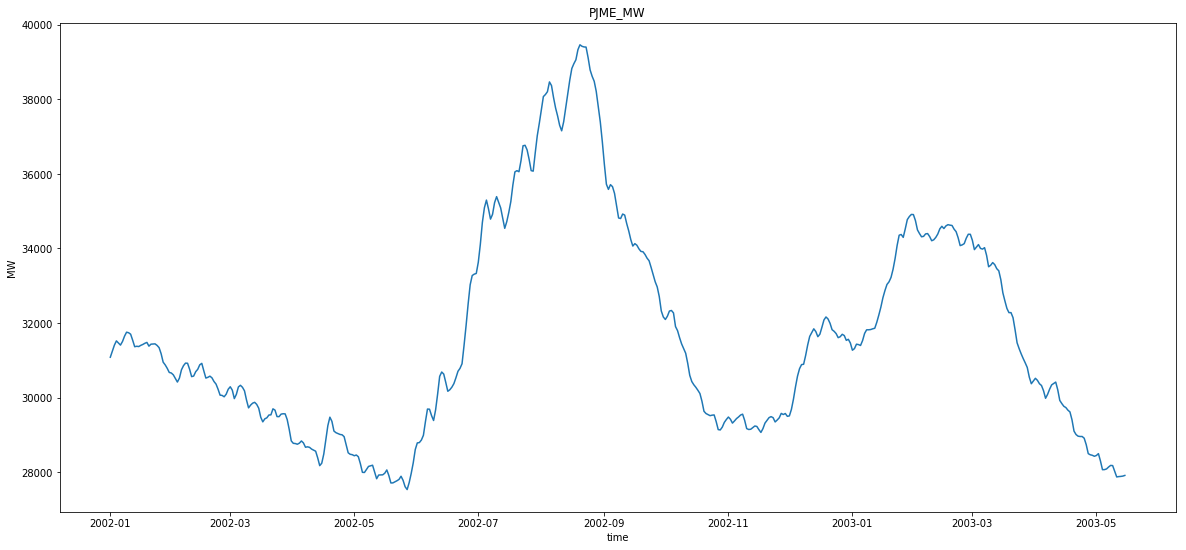

In [61]:
# и отрисуем результат
plt.figure(figsize=(20, 9))
plt.plot(df.index[:500],df['PJME_MW'].values[:500])
plt.xlabel('time')
plt.ylabel('MW')
plt.title('PJME_MW')

In [77]:
exponential_smoothing(np.array(df[['PJME_MW']]), 0.01)
#df[['PJME_MW']]

[array([31080.73913043]),
 array([31082.3295317]),
 array([31085.54007683]),
 array([31089.87455365]),
 array([31093.60875432]),
 array([31096.73575734]),
 array([31100.79525247]),
 array([31106.24426835]),
 array([31112.70402898]),
 array([31118.95885268]),
 array([31124.75580577]),
 array([31128.87889974]),
 array([31131.21864685]),
 array([31133.65504884]),
 array([31135.99155322]),
 array([31138.62591482]),
 array([31141.47486478]),
 array([31144.60512728]),
 array([31147.94000327]),
 array([31150.24394247]),
 array([31153.05313364]),
 array([31155.88846388]),
 array([31158.7243144]),
 array([31161.11994466]),
 array([31162.88439161]),
 array([31163.00074511]),
 array([31160.85146686]),
 array([31157.99356161]),
 array([31154.2408091]),
 array([31149.42164163]),
 array([31144.50242047]),
 array([31139.13507926]),
 array([31132.84106898]),
 array([31125.65450678]),
 array([31119.6145511]),
 array([31115.85126968]),
 array([31113.23899871]),
 array([31111.33808002]),
 array([31109.40

In [78]:
df['t'] = 0
df.iloc[1:,1]=df.iloc[:-1,0].values
df['t1']=0
df.iloc[2:,2]=df.iloc[:-2,0].values
df['t2']=0
df.iloc[3:,3]=df.iloc[:-3,0].values
df.fillna(0)
# добавили сглаживание (3 вида - просто для коллекции)
df['exp_0_01'] = exponential_smoothing(np.array(df['PJME_MW']), 0.01)
df['exp_0_03'] = exponential_smoothing(np.array(df['PJME_MW']), 0.03)
df['exp_0_08'] = exponential_smoothing(np.array(df['PJME_MW']), 0.08)
# добавим разности - 1-й порядок
df['diff1'] = 0
df['diff1'].iloc[1:] = df.iloc[:-1,0]-df.iloc[1:,0]

df.head()

C:\Users\Gry\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,PJME_MW,t,t1,t2,exp_0_01,exp_0_03,exp_0_08,diff1
Date,,,,,,,,
2002-01-01,31080.739130,0.000000,0.000000,0.000000,[31080.739130434784],[31080.739130434784],[31080.739130434784],0
2002-01-02,31239.779257,31080.739130,0.000000,0.000000,[31082.3295317029],[31085.51033423913],[31093.462340579714],0
2002-01-03,31403.384044,31239.779257,31080.739130,0.000000,[31085.54007682971],[31095.04654554348],[31118.256076884063],0
2002-01-04,31518.987759,31403.384044,31239.779257,31080.739130,[31089.87455364973],[31107.764781942118],[31150.31461143986],0
2002-01-05,31463.294621,31518.987759,31403.384044,31239.779257,[31093.60875432213],[31118.43067711055],[31175.353012195865],0


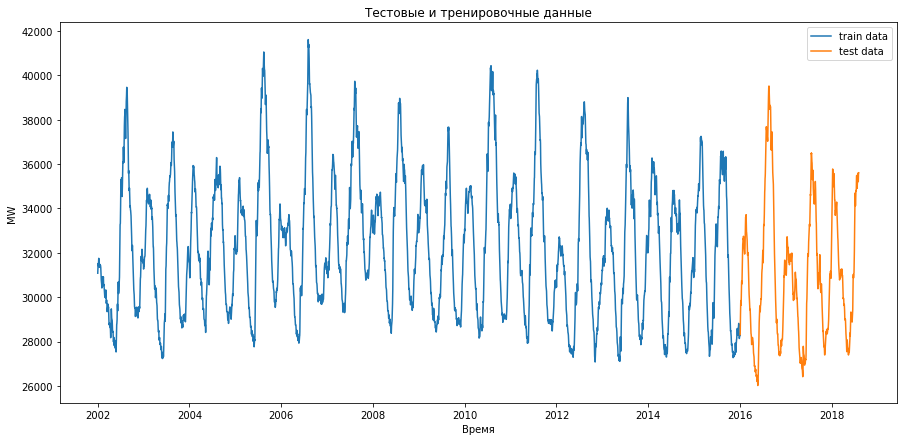

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
scl =StandardScaler()
scly =StandardScaler()

# сделаем примеры и модель 
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

train, test = split_data_b( df, '2016-01-01')
X_train = train.iloc[:-1,:]
y_train = train[df.columns[0]].values[1:]
X_test  = test.iloc[:-1,:]
y_test  = test[df.columns[0]].values[1:]


plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('MW')
plt.plot(train.index.get_level_values('Date'),train[df.columns[0]], label='train data' )
plt.plot(test.index.get_level_values('Date'),test[df.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

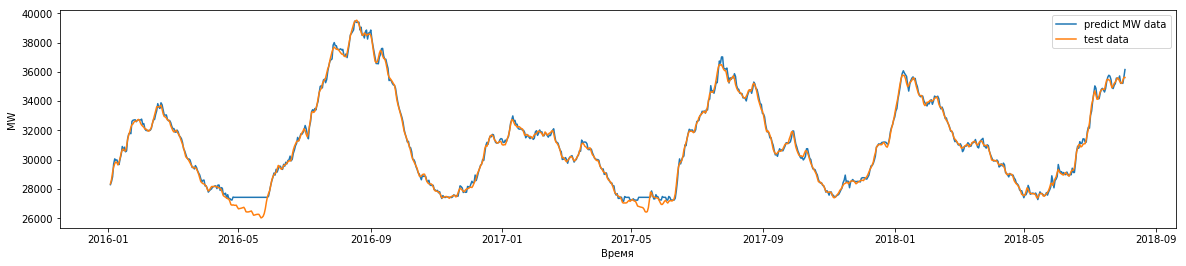

ошибка градиентного бустинга :   0.5756407682882331 %


In [80]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train, y_train ) 
X_test_pred_gb = model_gb.predict(X_test)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('MW')
plt.plot(test.index[1:],X_test_pred_gb, label='predict MW data' )
plt.plot(test.index[1:],y_test, label='test data')
#plt.plot(d_data.loc['2016-01-02':].index, d_data.loc['2016-01-02':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

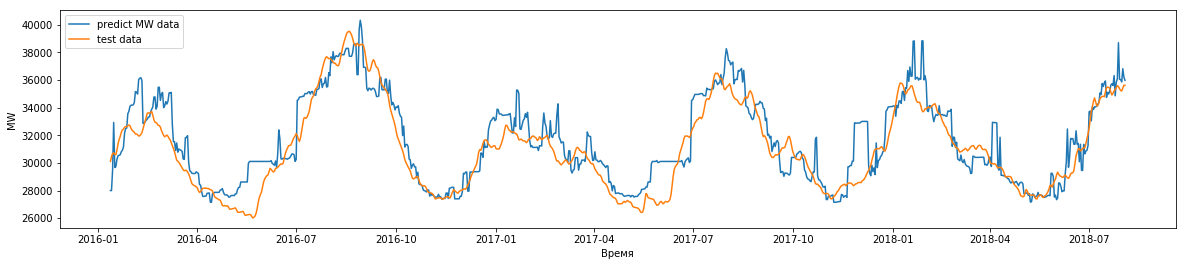

ошибка градиентного бустинга :   3.742519807887643 %


In [82]:
h=10
X_train = train.iloc[:-h,:]
y_train = train[df.columns[0]].values[h:]
X_test = test.iloc[:-h,:]
y_test = test[df.columns[0]].values[h:]

model_gb.fit( X_train, y_train) 
X_test_pred_gb = model_gb.predict(X_test)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('MW')
plt.plot(test.index[h:],X_test_pred_gb, label='predict MW data' )
plt.plot(test.index[h:],y_test, label='test data')
#plt.plot(d_data.loc['2016-01-02':].index, d_data.loc['2016-01-02':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')


In [ ]:
2. Оцените ошибку модели.
3. Сделайте вывод о том, как изменилась ошибка модели по значениям h.
с увеличением глубины предсказания качество упало примерно так же, как и по нефти:
 с   0.57 % для h=1 до 3.74 % для h=10 (по электро)
 с   0.44 % для h=1 до 4.56 % для h=10 (по нефти)

4. Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

а) Изменение температуры за окном :).

б) Количество денег, которые тратят покупатели в интернет магазине.

в) Вес растущего котенка.

г) Прирост объема деревьев в лесу от времени

In [ ]:
а) явная нестационарность на всех масштабах: можно видеть дневной цикл, сезонность, 
    многолетние циклы. То же и для дисперсии: для облачной и ясной погоды она разная
б) должны быть циклы месячные (в дни зарплат больше), суточные (меньше в рабочее время); 
   в масштабах лет - тренд на увеличение покупок с развитием популярности таких услуг
в) тренд - ежедненвный прирост, если растет здоровым - небольшая, но регулярная 
   цикличность между кормежками
г) Тренд - увеличение объема, сезонные колебания (влажный-засушливый)